Mariana Gómez Cuartas \
Universidad de Antioquia

<a href="https://colab.research.google.com/github/marianagomezcuartas/Relatividad/blob/main/codigos/cuaderno1(1.1_1.2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías

In [1]:
%pip install -q numpy matplotlib celluloid IPython ipywidgets pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from ipywidgets import interact
import pandas as pd

In [3]:
plt.rcParams.update({'font.size': 14})

# Capítulo 1: Relatividad epecial y espacio-tiempo

## Introducción

Es importante comenzar mencionando que, a escala cósmica, la gravedad domina el universo, determinando la geometría del espacio y el tiempo y, por lo tanto, la distribución a gran escala de las galaxias. Por ejemplo, los fenómenos gravitacionales conducen a conceptos como los agujeros negros y las ondas gravitacionales.

La comprensión del universo se desarrolló a un nivel más profundo gracias a Maxwell, quien en el siglo XIX unificó la electricidad, el magnetismo y la óptica al predecir que las ondas electromagnéticas viajan en el vacío a la velocidad de la luz. Sin embargo, Maxwell, al igual que muchos científicos de su época, asumía que estas ondas necesitaban un medio llamado «éter» para propagarse.

Esta creencia se puso en duda cuando experimentos como el de Michelson y Morley sugirieron que la velocidad de la luz era constante en todas las direcciones, independientemente del movimiento de la Tierra. Este hallazgo, incompatible con la existencia del éter, impulsó a científicos como Lorentz y Poincaré a proponer ideas parciales, pero fue Albert Einstein quien, en 1905, con su teoría de la relatividad especial, ofreció una solución definitiva: el éter no era necesario, ya que el espacio y el tiempo son relativos al observador.

Esta teoría revolucionó por completo la concepción clásica del espacio y el tiempo.

## Conceptos básicos

### Evento
Se define como una ocurrencia instantánea, asociada con un punto específico en el espacio, y se describe mediante cuatro coordenadas: tres espaciales (x, y, z --> coordenadas cartesianas) y una temporal (t).

Por ejemplo, en la siguiente animación puede observar que cada uno de los puntos representa un evento diferente, aún si este no cambia de posición, pues cada frame de la animación representa un instante diferente en el tiempo.

Text(0, 0.5, 'Y')

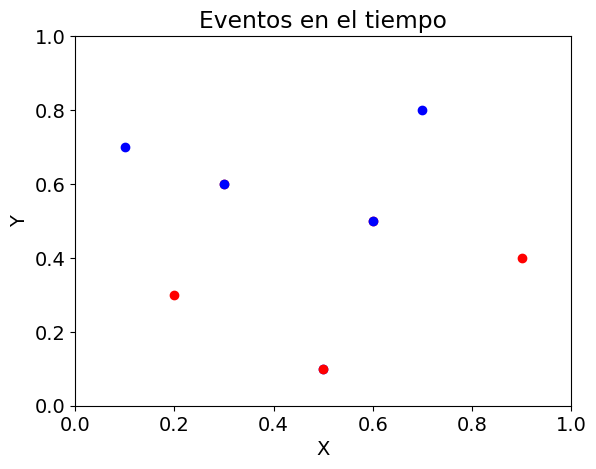

In [4]:
#Creo la figura y el objeto camara
fig = plt.figure()
camara = Camera(fig)

plt.xlim(0, 1)
plt.ylim(0, 1)

#eventos
eventos = [
    (0.2, 0.3),  # tiempo 0
    (0.5, 0.1),  # tiempo 1
    (0.5, 0.1),  # tiempo 2 (misma posición que tiempo 1)
    (0.7, 0.8),  # tiempo 3
    (0.3, 0.6),  # tiempo 4
    (0.3, 0.6),  # tiempo 5 (misma posición que tiempo 4)
    (0.9, 0.4),  # tiempo 6
    (0.1, 0.7),  # tiempo 7
    (0.6, 0.5),  # tiempo 8
    (0.6, 0.5)   # tiempo 9 (misma posición que tiempo 8)
]

for tiempo in range(len(eventos)):
    x, y = eventos[tiempo]
    color = 'red' if tiempo % 2 == 0 else 'blue'
    plt.scatter(x, y, color=color)
    camara.snap()

plt.title("Eventos en el tiempo")
plt.xlabel("X")
plt.ylabel("Y")

In [5]:
animacion= camara.animate(interval=700, repeat=False)
HTML(animacion.to_jshtml())

### Marcos de referencia

Un marco de referencia es un sistema para asignar coordenadas a eventos. Al iniciar a estudiar un problema, es fundamental establecer un marco de referencia que va a depender de la simetría del problema (por ejemplo, cartesianas, cilíndricas o esféricas). Estas coordenadas (únicas y bien definidas) son las que se asignan a los eventos, y en principio lo que se debe hacer es establecer un origen, determinar la orientación en los ejes, y tener en cuenta la coordenada temporal. En este sentido, lo que se puede hacer es imaginar que el espacio está lleno de relojes sincronizados, tal como se observa en la siguiente imagen:


![imagen](https://drive.google.com/uc?export=view&id=1vqeb8rBZb4sv3jtmV8QLSGx8RcFqg-wt)

Ahora bien, cuando se usa un marco de referencia particular, el tiempo asignado a un evento es aquel que se muestra en el relojen el sitio del evento, cuando ocurre el evento. Es enetonces importante tener en cuenta que el tiempo de un evento no es el correspondiente a lo observado desde un punto lejano, sino el tiempo en el evento.



#### Marco de referencia inercial

Es un marco en el cual se cumple la primera ley de Newton, es decir, en el cual un cuerpo que no está sujeto a ninguna fuerza neta mantiene una velocidad constante.

Se cumple lo siguiente:

- Cualquier marco que se mueve a velocidad constante relativo a un marco de referencia inercial, también es un marco de referencia incercial.
- Si un marco acelera relativo a un marco de referencia inercial, entonces este no puede ser un marco de referencia incercial.
- Cualquier marco que rote relativo a un marco de referencia incercial, no es un marco de referencia inercial.

### Observadores
Se trata de un individuo que usa un sistema de referencia particular, para registrar eventos. Particularmente, la relatividad especial se ocupa de obsrevaciones, realizadas por observadores incerciales, es decir, aquellos que están en un marco de referencia incercial.

### Postulados de la relatividad especial

Einstein expuso dos enunciados que creía verdaderos con base a la física que conocía en ese momento:

1) Las leyes de la física pueden escribirse igual en todos los marcos de referencia inerciales --> también conocido como Principio de Relatividad

2) La velocidad de la luz en el vacío tiene el mismo valor constante $c = 3 \times 10^8 m s^{-1}$, en todos los marcos de referencia incerciales --> también conocido como principio de constancia de la velocidad de la luz.

## Transformación de coordenadas

La teoría de la relatividad se va a ocupar de la relación entre observadores en movimiento relativo. Particularmente, en la relatividad especial los observadores son inerciales, es decir, se mueven con velocidad constante.

Estos observadores, llamados O y O', se ubican en los marcos de referencia S y S', los cuales cumplen con las siguientes condiciones:

- El origen del marco de referencia S' se mueve con velocidad constante V respecto al marco de referencia S.

- Los ejes de ambos marcos de referencia son paralelos y tienen la misma orientación.

- El evento en el cual el origen de ambos marcos de referencia coincide ocurre en el instante t = 0 para S y t' = 0 para S'.

Estas tres condiciones se pueden ver reflejadas en la siguiente animación, en la cual por simplicidad se ha dejado el eje Z saliendo de la pantalla (representado como un punto).

Text(0, 0.5, 'Y')

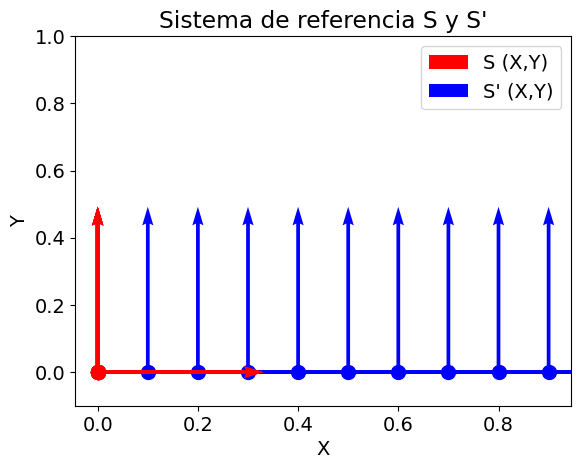

In [6]:
#Creo la figura y el objeto camara
fig = plt.figure()
camara = Camera(fig)

#plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)

tiempos = np.linspace(0, 9, 10)
V = 0.1
desplazamientos = V * tiempos     #porque la posicioón inicial era 0

plt.quiver(0, 0, 0, 1,  color='r', scale=3, label='S (X,Y)')
plt.quiver(desplazamientos[0], 0, 1, 0, color='b', scale=3, label="S' (X,Y)")
for i in desplazamientos:
    #ejes X, Y
    plt.quiver(0, 0, 0, 1,  color='r', scale=3)
    plt.quiver(0, 0, 1, 0,  color='r', scale=3)
    plt.scatter(0,0, color='red', s=100)
    #ejes X', Y'
    plt.quiver(i, 0, 0, 1, color='b', scale=3)
    plt.quiver(i, 0, 1, 0, color='b', scale=3)
    plt.scatter(i, 0, color='blue', s=100)
    camara.snap()

plt.legend()
plt.title("Sistema de referencia S y S'")
plt.xlabel("X")
plt.ylabel("Y")


In [7]:
animacion= camara.animate(interval=500, repeat=False)
HTML(animacion.to_jshtml())

Es importante que tomar en cuenta el eje X como aquel que se mueve es una convención, y no conduce a una pérdida de generalidad, pues se pueden realizar reasignaciones de ejes y reconfiguración de los relojes para obtener la misma relación entre los marcos de referencia.

En relatividad especial, un evento se describe por cuatro coordenadas: tres espaciales y una temporal. En el marco de referencia S, un evento se describe por las coordenadas (x, y, z, t), mientras que en el marco de referencia S' se describe por (x', y', z', t'). En general, ambos observadores no van a coincidir en las coordenadas de un evento, es decir, no se cumple que (x, y, z, t) = (x', y', z', t').

A pesar de no ser iguales, las coordenadas de un evento en los dos marcos de referencia están relacionadas por una transformación. En primer lugar, se pueden considerar las **transformaciones Galileanas** que proporcionan las bases para la relatividad Galileana, y las **transformaciones de Lorentz**, en las cuales se basa la relatividad especial de Einstein.

## Transformaciones Galileanas

Las transformaciones galileanas se pueden deducir de una forma bastante intutiva, y partiendo de la animación realizada previamente. Las ecuaciones que describen la transformación son las siguientes:

$$t' = t$$
$$x' = x - Vt$$
$$y' = y$$
$$z' = z$$

Donde V es la magnitud de la velocidad del marco de referencia S' respecto al marco de referencia S. En este caso, se puede observar que el tiempo es el mismo para ambos marcos de referencia, y que la posición en el eje X del evento en el marco de referencia S' depende de la posición en el eje X del evento en el marco de referencia S y del tiempo en el marco de referencia S. Esto implica que si un evento ocurre en un lugar y tiempo determinado para un observador, va a ocurrir en un lugar diferente y al mismo tiempo para otro observador que se mueve con velocidad constante respecto al primero.

Sin embargo, Einstein se dió cuenta de que esta stranformaciones asumían algunas cosas acerca del timepo y del espacio, como por ejemplo que el tiempo es absoluto de alguna forma (reflejado en la ecuación de transformación del tiempo). Se trata de ideas que no fueron verificadas.

### Transformaciones de Lorentz

Ahora, Einstein hace uso de sus dos postulados para deducir unas tranformaciones apropiadas entre los sistemas S y S', de modo que no fuera necesario hacer ningún tipo se suposiciones ijustificadas.

Cabe mencionar que las tranformaciones fueron obtenidas previamente por Lorentz, por sus propios medios. Las ecuaciones son las siguientes:

$$t' = \frac{t - Vx/c^2}{\sqrt{1 - V^2/c^2}}$$
$$x' = \frac{x - Vt}{\sqrt{1 - V^2/c^2}}$$
$$y' = y$$
$$z' = z$$

Estas transformaciones relacionan el espacio y el tiempo, pues las coordendas x' y t' dependen ambas de x y t. Esto implica que el tiempo y el espacio no son absolutos, sino que dependen del observador. En este sentido, se puede decir que el tiempo y el espacio son relativos al observador.

A continuación, hacemos un gráfico interactivo en el cual se cambian los valores de x, t, y V, para observar cómo cambian las coordenadas x, t, x' y t' de un evento. 
En este caso, no se estudia el cambio de y y z, pues se asume que no hay movimiento en esos ejes. 
Nos damos cuenta que se cumple que en el instante cero, tanto S como S' coinciden, y que a medida que aumenta el tiempo, la coordenada espacial o la velocidad, las coordenadas de los dos marcos de referencia se separan (es decir, la discrepancia entre los dos marcos de referencia aumenta).

In [8]:
def plot_lorentz_transform(x, t, V):
    """
    Gráfico interactivo para mostrar las coordenadas originales y transformadas de un punto
    bajo las transformaciones de Lorentz.

    Parámetros:
    - x: Coordenada espacial en el sistema S.
    - t: Coordenada temporal en el sistema S.
    - V: Velocidad relativa entre sistemas (en fracción de c).
    """
    c = 1  # unidades naturales (velocidad de la luz)
    gamma = 1 / np.sqrt(1 - (V**2) / (c**2))
    
    # Coordenadas transformadas
    t_prime = gamma * (t - (V / c**2) * x)
    x_prime = gamma * (x - V * t)
    
    #graficar
    plt.figure(figsize=(6, 4))
    plt.scatter(x, t, color='blue', label="Sistema S (x, t)")
    plt.scatter(x_prime, t_prime, color='red', label="Sistema S' (x', t')")
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.title("Transformaciones de Lorentz")
    plt.xlabel("x (m)")
    plt.ylabel("t (s)")
    plt.xlim(-5, 11)
    plt.ylim(-1, 11)
    plt.legend(loc='upper right', framealpha=0.5)
    plt.grid(True)
    plt.show()

# Crear el widget interactivo
interact(plot_lorentz_transform, x=(0, 10, 0.1), t=(0, 10, 0.1), V=(0, 0.99, 0.01))

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), FloatSlider(value=5.0, description='t…

<function __main__.plot_lorentz_transform(x, t, V)>

En estas ecuaciones se encuentra presente un término llamado factor de Lorentz ($1 / \sqrt{1 - V^2/c^2}$), el cual se representa como $\gamma(V)$, donde V es la velocidad relativa entre ambos marcos.

Entonces, teniendo en cuenta este factor, las transformaciones de Lorentz se pueden escribir de la siguiente manera:

$$t' = \gamma(V)(t - \frac{Vx}{c^2})$$
$$x' = \gamma(V)(x - Vt)$$
$$y' = y$$
$$z' = z$$

En la siguiente tabla se toman algunos valores de V y se calcula el factor de Lorentz. Se puede observar que a medida que V se acerca a c, el factor de Lorentz aumenta considerablemente, lo que implica que el tiempo y la distancia se ven afectados significativamente en esos casos. 

**Importante:** Se observa que para aproximadamente  0.310345 c, el factor de lorentz (1.051941) sigue siendo un valor muy cercano a 1, con lo cual podemos decir que el 31% de la velocidad de la luz aun no es considerado con alto impacto relativista. 

In [9]:
c = 1  # m/s
velocidades = np.linspace(0, 1, 30)  # Velocidades como fracciones de c

# Calcular el factor de Lorentz para cada velocidad
tabla_lorentz = 1 / np.sqrt(1 - (velocidades[:-1] / c)**2)

#resultados
tabla_lorentz = pd.DataFrame({
    'Velocidad (V*C)': velocidades[:-1],
    'Factor de Lorentz': tabla_lorentz
})

print(tabla_lorentz)

    Velocidad (V*C)  Factor de Lorentz
0          0.000000           1.000000
1          0.034483           1.000595
2          0.068966           1.002387
3          0.103448           1.005394
4          0.137931           1.009650
5          0.172414           1.015203
6          0.206897           1.022116
7          0.241379           1.030470
8          0.275862           1.040369
9          0.310345           1.051941
10         0.344828           1.065342
11         0.379310           1.080766
12         0.413793           1.098453
13         0.448276           1.118699
14         0.482759           1.141874
15         0.517241           1.168443
16         0.551724           1.199002
17         0.586207           1.234322
18         0.620690           1.275419
19         0.655172           1.323663
20         0.689655           1.380952
21         0.724138           1.450000
22         0.758621           1.534843
23         0.793103           1.641802
24         0.827586      

En la siguiente gráfica se puede ver como el factor de lorentz cambia conforme la V varía. Es 1 cuando V = 0, y tiende a infinito cuando V tiende a c.

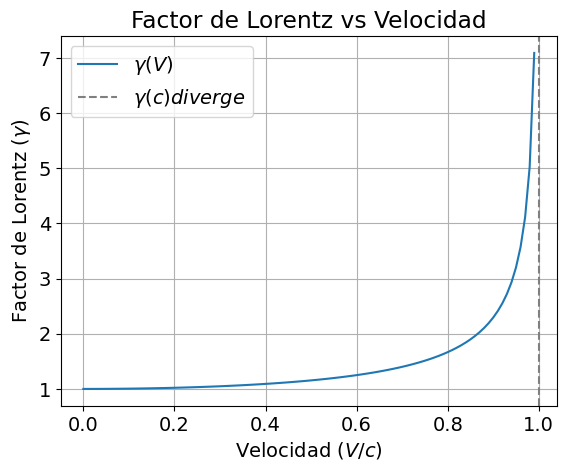

In [10]:
# Definir la velocidad de la luz, en unidades canonicas
c = 1

# Velocidades como fracciones de c
velocidades = np.linspace(0, 0.99, 100)  # Velocidades de 0 a 0.99c

# Hallar el factor de Lorentz para cada velocidad
lorentz_factor = 1 / np.sqrt(1 - (velocidades / c)**2)

plt.figure()
plt.plot(velocidades, lorentz_factor, label=f'$\gamma(V)$')
plt.axvline(1, color='gray', linestyle='--', label=f'$\gamma(c) diverge$')
plt.title("Factor de Lorentz vs Velocidad")
plt.xlabel(f'Velocidad ($V/c$)')
plt.ylabel('Factor de Lorentz ($\gamma$)')
plt.grid(True)
plt.legend()
plt.show()

Se observa entonces que cuando V = 0, las transformaciones de Lorentz se convierten en las transformaciones Galileanas. Esto implica que la relatividad galileana es un caso particular de la relatividad especial, y que las transformaciones de Lorentz son una generalización de las transformaciones Galileanas.

Matricialmente, las transformaciones de Lorentz se pueden escribir como:


$$
\begin{bmatrix}
ct' \\
x' \\
y' \\
z'
\end{bmatrix}
=
\begin{bmatrix}
\gamma(V) & -\gamma(V)  V/c & 0 & 0 \\
-\gamma(V)  V/c & \gamma(V) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
ct \\
x \\
y \\
z
\end{bmatrix}
$$

Esto mismo se puede reescribir en términos de la matriz de transformación de Lorentz, $\Lambda$, de la siguiente manera:

$$x'^{\mu} = \Lambda^{\mu}_{\ \nu}\, x^{\nu}$$

, donde:

$$\Lambda^{\mu}_{\ \nu} =
\begin{bmatrix}
\gamma(V) & -\gamma(V)  V/c & 0 & 0 \\
-\gamma(V)  V/c & \gamma(V) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}$$


La cantidad $x^{\mu}$ se conoce como el cuadrivector de posición, debido a que sus cuatro componentes $(x^{0}, x^{1},x^{2},x^{3}) = (ct, x, y, z)$ describen la posición de un evento en el espacio-tiempo. Es importante tener en cuenta que la primera componente es ct y no solo t, debido a que se desea que las cuatro componentes de este vector tengan unidades de distancia. Entonces, otra forma de escribir las transformaciones de Lorentz es en términos de sumatoria:

$$x'^{\mu} = \Lambda^{\mu}_{\ \nu}\, x^{\nu} = \sum_{\nu=0}^{3} \Lambda^{\mu}_{\ \nu}\, x^{\nu}$$

, con $\mu = 0, 1, 2, 3$ y $\nu = 0, 1, 2, 3$.

En esta notación se dice que $\mu$ es un índice libre, es decir, cualquier elección entre 0,1,2,3 conduce a una ecuación diferente, Por otro lado $\nu$ no es libre, pues para cualquier valor que se escoja de $\mu$ es necesario sumar sobre todos los valores de $\nu$.

Con todo lo anterior, vimos cómo con las transformaciones de Lorentz podemos obtener las coordenadas de un evento en S', cuando son conocidas las coordenadas del mismo evento en S.

Igual de importante es transformar las coordenadas en S' de regreso a S. Para esto, se pueden usar las transformaciones inversas de Lorentz, que son las siguientes:

$$t = \gamma(V)(t' + \frac{Vx'}{c^2})$$
$$x = \gamma(V)(x' + Vt')$$
$$y = y'$$
$$z = z'$$

Estas transformaciones se pueden escribir de forma matricial como:

$$
\begin{bmatrix}
ct \\
x \\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
\gamma(V) & \gamma(V) V/c & 0 & 0 \\
\gamma(V) V/c & \gamma(V) & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
ct' \\
x' \\
y' \\
z'
\end{bmatrix}
$$

De forma indicial como:
$$x^{\mu} = \Lambda^{-1 \mu}_{\ \nu}\, x'^{\nu}$$

Y en términos de sumatoria como:

$$x^{\mu} = \Lambda^{-1 \mu}_{\ \nu}\, x'^{\nu} = \sum_{\nu=0}^{3} \Lambda^{-1 \mu}_{\ \nu}\, x'^{\nu}$$

Se observa que en las transformaciones inversas, la única diferencia es  es que las cantidades primadas son intercambiadas por las no primadas, y V se reemplaza por -V (como $\gamma(V)$ es una función par, se puede dejar igual).

Construmos una función que calcule las transformaciones de lorentz, dadas las coordenadas de un evento en el sistema S:

In [11]:
def lorentz_transform(ct, x, y, z, V):
    """
    Calcula las coordenadas en el sistema S' mediante transformaciones de Lorentz.

    Parámetros:
    - ct: Coordenada temporal (c * tiempo) [m]
    - x, y, z: Coordenadas espaciales [m]
    - V: Velocidad relativa entre sistemas (en dirección x) [m/s]

    Retorna:
    - (ct', x', y', z'): Coordenadas en S' como tupla
    """

    #velocidad de la luz --> no la tomamos en unidades canónicas porque queremos hacer el calculo en el SI
    c = 3e8  # m/s
    gamma = 1 / np.sqrt(1 - (V**2)/(c**2))

    ct_prime = float(gamma * (ct - (V/c)*x))
    x_prime = float(gamma * (x - (V/c)*ct))
    y_prime = y
    z_prime = z

    return (ct_prime, x_prime, y_prime, z_prime)

Lo aplicamos a un caso específico:

(ct = 3m, x=4m, y=0m, z=0m) y  V = 3c/4

In [12]:
c = 3e8  # m/s
print(f' las coordenadas en el sistema primado son {lorentz_transform(3,4,0,0,3/4*c)}')

 las coordenadas en el sistema primado son (0.0, 2.6457513110645903, 0, 0)


## Una derivación de las transformaciones de Lorentz

En esta sección vamos a hacer un bosquejo de la deducción de las transformaciones de Lorentz, a partir de los postulados de la relatividad especial y algunos conceptos teóricos.

Para comenzar, vamos a escribir las tranformaciones del sistema S al S' como una expansión de la forma:

$$t' = a_0 + a_1 t + a_2 x + a_3 t^2 + a_4 x^2 + ....$$
$$x' = b_0 + b_1 x + b_2 t + b_3 x^2 + b_4 t^2 + ....$$

La idea ahora es comenzar a eliminar, o bien, determinar los coeficientes de estas tranformaciones. Para ello se siguen (de forma general) los siguientes pasos:

1. Teniendo en cuenta que el origen de ambos marcos de referencia (para un evento particular) coincide en el instante t = 0, se puede escribir que $x = 0$ y $t = 0$, y $t' = a_0$ y $x' = b_0$. Para que esto se cumpla, es necesario que $a_0 = 0$ y $b_0 = 0$.

2. Ahora, se va a tener en cuenta que los observadores están sobre marcos de referencia inerciales. Esto implica que si un evento ocurre en el marco de referencia S, y no está sujeto a ninguna fuerza, entonces el evento también ocurre en el marco de referencia S' sin que haya fuerzas actuando sobre él. 
Es así que en las ecuaciones de transformación mostradas previamente, los coeficientes asociados a los términos de orden superior deben ser cero, es decir, $a_3 = a_4 = b_3 = b_4 = 0$, etc..., pues de no ser así, el sistema S' estaría experimentando alguna fuerza, lo cual viola el primer postulado de la relatividad especial.

- Con esto, las transformaciones se simplifican a:
$$t' = a_1 t + a_2 x$$
$$x' = b_1 x + b_2 t$$

Ahora bien, para determinar los coeficientes restantes se tiene en cuenta lo siguiente:

3. En cualquier tiempo t, el origen de S' estará en $x=Vt$ en S y en x'=0 en S'.
Se obtiene que $b_2 = -b_1 V$
Luego de operar un poco, con las ecuaciones que se tienen en el momento, se obtiene que:
$$\frac{x'}{t'} = \frac{b_1 x - b_1 Vt}{a_1 t + a_2 x}$$

4. En cualquier tiempo t', el origen de S estará en $x'=-Vt'$ en S' y en x=0 en S. Sustituimos en la ecuación anterior y se obtiene que $b_1 = a_1$
Operando con las ecuaciones disponibles se obtiene que:
$$\frac{x'}{t'} = \frac{b_1 (x/t) - b_1 V}{b_1 + a_2 (x/t)}$$

5. Usar la constancia de la velocidad de la luz en la anterior expresión, de tal forma que:
$$c = \frac{x'}{t'} = \frac{b_1 c - b_1 V}{b_1 + a_2 c}$$

Y despejando $a_2$ se obtiene que: $$a_2 = \frac{-Vb_1}{c^2} = \frac{-Va_1}{c^2}$$

6. Reemplazando todos estos coeficientes en las ecuaciones de transformación, se obtiene que:

$$t' = a_1(t - \frac{Vx}{c^2})$$
$$x' = a_1(x - Vt)$$

7. Para determinar el valor de a_1 se comienza por escribir las tranformaciones inversas:

$$t = a_1(t' + \frac{Vx'}{c^2})$$
$$x = a_1(x' + Vt')$$

Sustituyendo en la ecuación de transformación para x', se obtiene que:
$$x' = a_1^2(1-\frac{V^2}{c^2})x'$$

Con lo cual, al tomar la raíz cuadrada positiva, se obtiene que $a_1 = \frac{1}{\sqrt{1 - V^2/c^2}}$, el cual corresponde al factor de Lorentz.




Text(0.5, 1.0, 'Sistema S considerando solo términos de primer órden')

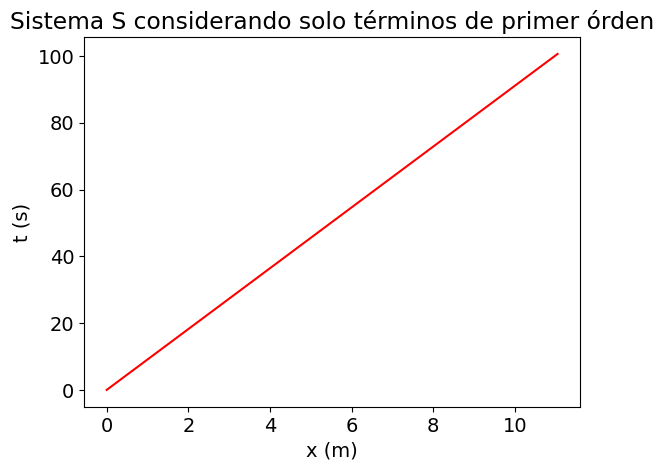

In [17]:
x_prime = np.linspace(0, 0.99, 100)
t_prime = np.linspace(0, 100, 100)
c = 3e8  # m/s
V = 0.1*c  # Velocidad en m/s

gamma = 1 / np.sqrt(1 - (V**2)/(c**2))

x = gamma * (x_prime + (V/c) * t_prime)
t = gamma * (t_prime + (V/c) * x_prime)

plt.plot(x, t, 'r', label='Sistema S')
plt.xlabel('x (m)')
plt.ylabel('t (s)')
plt.title('Sistema S considerando solo términos de primer órden')

Observamos entonces que considerando términos de primero orden, no se manifiesta una aceleración en la partícula.